In [35]:
import numpy as np
import sempler.utils
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [43]:
def plot_matrix(A, ax=None, vmin=-3, vmax=3, formt="%0.2f", thresh=1e-16, block=False):
    """Plot a heatmap for the given matrix A.

    Parameters
    ----------
    A : numpy.ndarray
        The matrix to plot.
    ax : matplotlib.pyplot.axis, optional
        The axis to plot on; if None, create a new figure.
    vmin : float, default=-3
        The lower threshold for color saturation.
    vmax : float, default=3
        The upper threshold for color saturation.
    formt : string, default="%0.2f"
        The format with which to print the values of the matrix on top
        of the corresponding cell.
    thresh : float, default=1e-16
        Elements of the matrix which are lower than the threshold in
        absolute value are plotted as a zero (i.e. white, no text)
    """
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.imshow(A, vmin=vmin, vmax=vmax, cmap='bwr')
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i, j] != 0:
                ax.text(j, i, formt % A[i, j], ha='center', va='center')

In [30]:
directory = 'hybrid_experiments/dataset_1658334292_runs:10_seed:42_tag:gaussian_1000_standardize:0_n:10,100,1000/'

In [31]:
original_data = np.load('scratch/gaussian_dataset/test_case_n:1000_g:0_r:0.npy')

In [60]:
means0 = [sample.mean(axis=0) for sample in original_data]
covs0 = np.array([np.cov(sample, rowvar=False) for sample in original_data])

In [61]:
hybrid_data = np.load(directory + 'test_case_n:1000_g:0_r:8.npy')

In [62]:
means1 = [sample.mean(axis=0) for sample in hybrid_data]
covs1 = np.array([np.cov(sample, rowvar=False) for sample in hybrid_data])

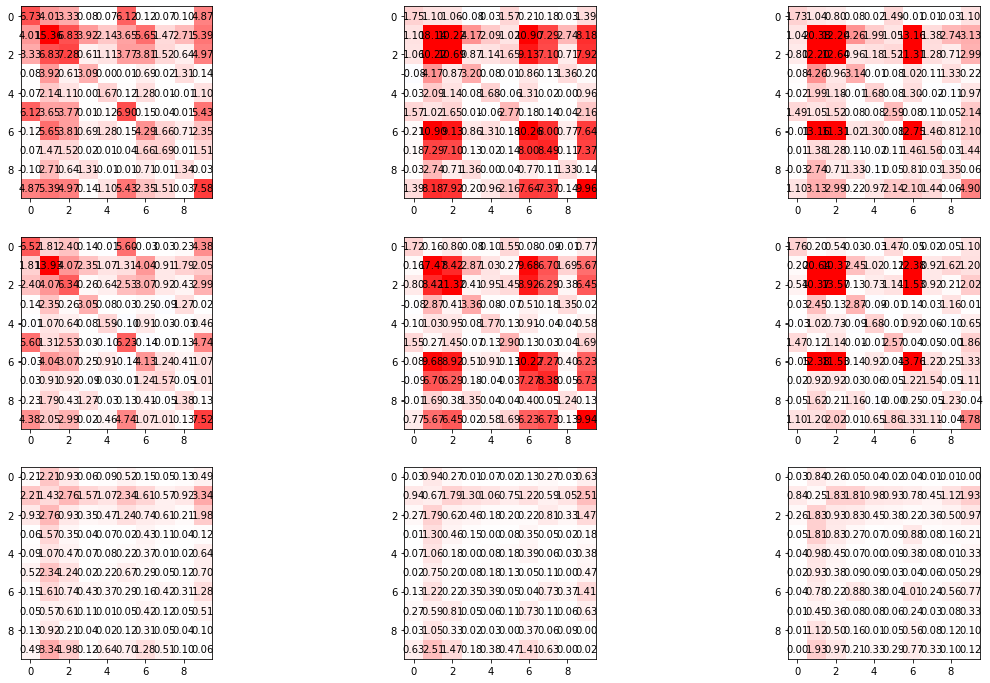

In [73]:
gs = gridspec.GridSpec(3, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(20,12))

for i,(mean,cov) in enumerate(zip(means0,covs0)):
    plt.subplot(gs[0,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)    

for i,cov in enumerate(covs1):
    plt.subplot(gs[1,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)
    
for i,cov in enumerate(abs(covs0-covs1)):
    plt.subplot(gs[2,i])
    ax = plt.gca()
    plot_matrix(cov, ax=ax, vmin=-10, vmax=10)

In [72]:
(abs(covs0 - covs1)/abs(covs0)).max(axis=(1,2))

array([40.15266411, 10.16672691,  5.61691629])